In [7]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
# Path ke file audio yang ingin diproses
file_path = "mindrarajin7.wav"  # Ganti dengan path file audio yang ingin diproses

In [9]:
# Parameter MFCC
SAMPLE_RATE = 48000
N_MFCC = 40  # Jumlah koefisien MFCC yang diambil
N_FFT = 4096  # Panjang FFT
HOP_LENGTH = 512  # Hop size
N_MELS = 128  # Jumlah filter Mel
LIFTER = 22  # Cepstral Liftering

X = []  # Menyimpan fitur MFCC
y = []  # Menyimpan label kata

In [10]:
def plot_signal(title, signal, sr=None, time_axis=True):
    """Fungsi untuk menampilkan grafik sinyal."""
    plt.figure(figsize=(10, 4))
    if time_axis and sr:
        # Ganti librosa.display.waveshow() dengan plt.plot()
        time = np.linspace(0, len(signal) / sr, len(signal))
        plt.plot(time, signal, color="blue")  # Plot manual
        plt.xlabel("Time (s)")
    else:
        plt.plot(signal, color="blue")
        plt.xlabel("Sample Index")
    
    plt.title(title)
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

In [11]:
def extract_mfcc(file_path, plot=True):
    """Ekstraksi fitur MFCC dengan visualisasi setiap proses."""
    
    # **1. DC Removal**
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    y = y - np.mean(y)  # Menghilangkan DC bias
    if plot:
        plot_signal("DC Removal - Sinyal Setelah Diperbaiki", y, sr)

    # **2. Framing**
    frames = librosa.util.frame(y, frame_length=N_FFT, hop_length=HOP_LENGTH)
    if plot:
        plot_signal("Frame Pertama (Setelah Framing)", frames[:, 0], time_axis=False)

    # **3. Windowing**
    window = np.hamming(N_FFT)
    windowed_frames = frames * window[:, np.newaxis]
    if plot:
        plot_signal("Frame Pertama Setelah Windowing", windowed_frames[:, 0], time_axis=False)

    # **4. FFT (Spektrum Frekuensi)**
    fft_frames = np.abs(np.fft.rfft(windowed_frames, axis=0))
    if plot:
        plt.figure(figsize=(10, 4))
        plt.plot(fft_frames[:, 0])
        plt.title("FFT - Magnitudo Spektrum Frame Pertama")
        plt.xlabel("Frekuensi (Hz)")
        plt.ylabel("Magnitude")
        plt.grid()
        plt.show()

    # **5. Mel-Frequency Warping**
    mel_spec = librosa.feature.melspectrogram(S=fft_frames, sr=sr, n_mels=N_MELS)
    if plot:
        plt.figure(figsize=(10, 5))
        librosa.display.specshow(librosa.power_to_db(mel_spec), sr=sr, x_axis="time", y_axis="mel")
        plt.colorbar(label="dB")
        plt.title("Mel Spectrogram")
        plt.show()

    # **6. DCT (Ekstraksi MFCC)**
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel_spec), sr=sr, n_mfcc=N_MFCC)
    if plot:
        plt.figure(figsize=(10, 5))
        librosa.display.specshow(mfcc, x_axis="time", sr=sr)
        plt.colorbar()
        plt.title("MFCC (Sebelum Cepstral Liftering)")
        plt.show()

    # **7. Cepstral Liftering**
    liftering_array = (1 + (LIFTER / 2) * np.sin(np.pi * np.arange(N_MFCC) / LIFTER))
    mfcc_liftered = mfcc * liftering_array[:, np.newaxis]  # Sesuaikan dimensi
    if plot:
        plt.figure(figsize=(10, 5))
        librosa.display.specshow(mfcc_liftered, x_axis="time", sr=sr)
        plt.colorbar()
        plt.title("MFCC Setelah Cepstral Liftering")
        plt.show()

    return np.mean(mfcc_liftered, axis=1)  # Ambil rata-rata tiap koefisien


Processing: mindrarajin7.wav


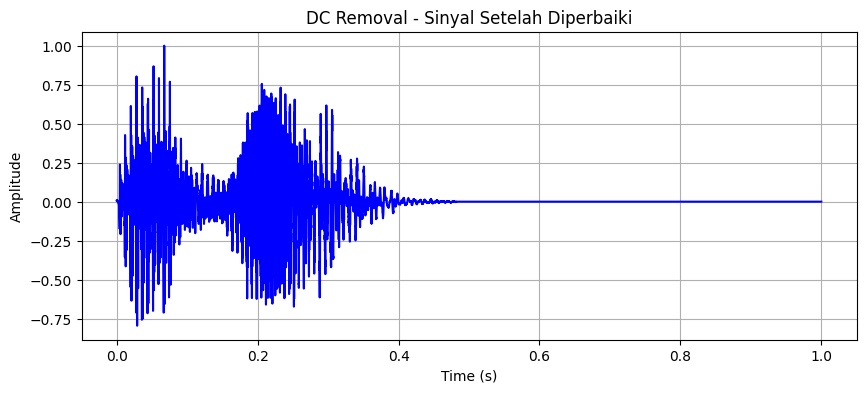

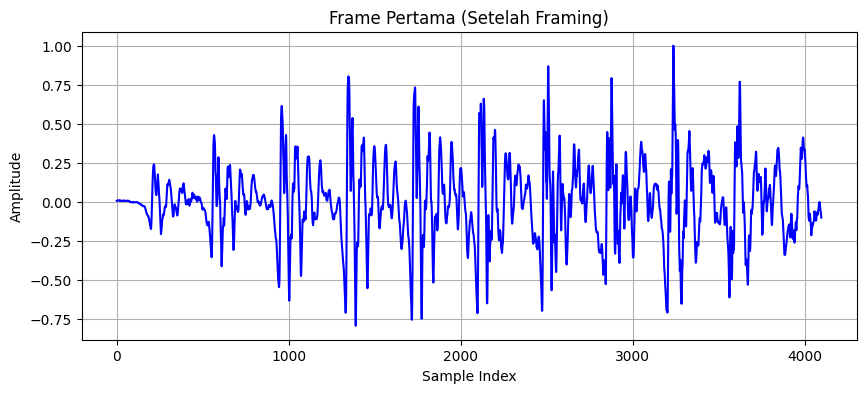

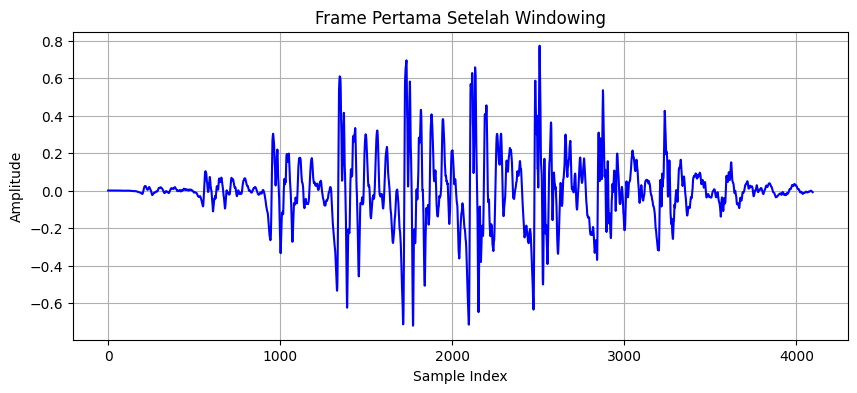

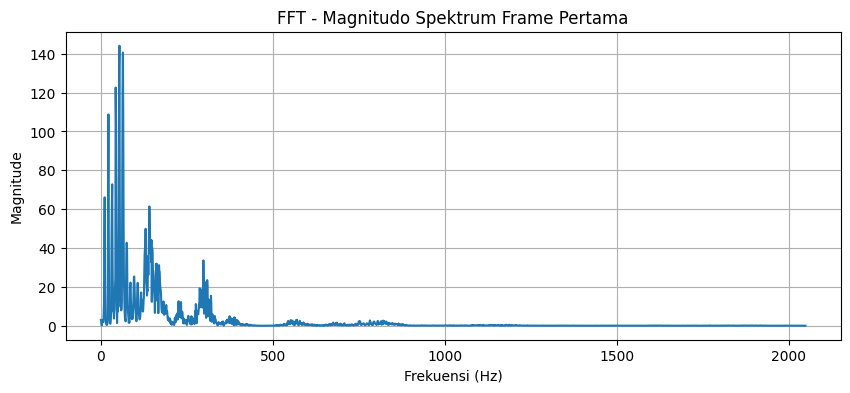

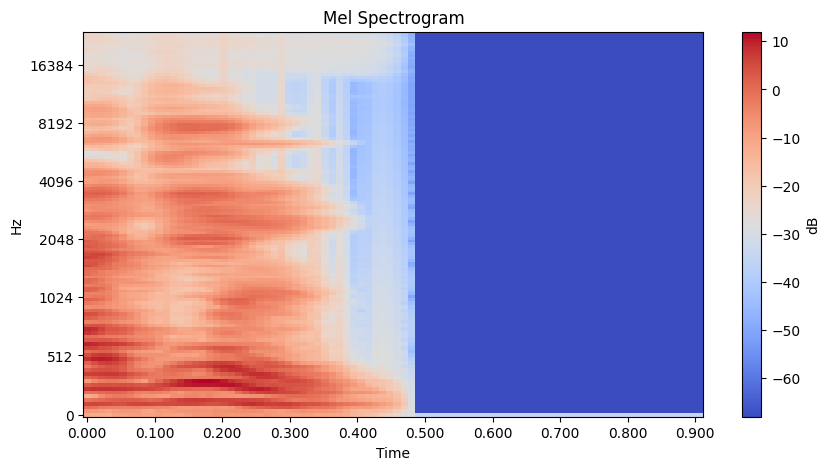

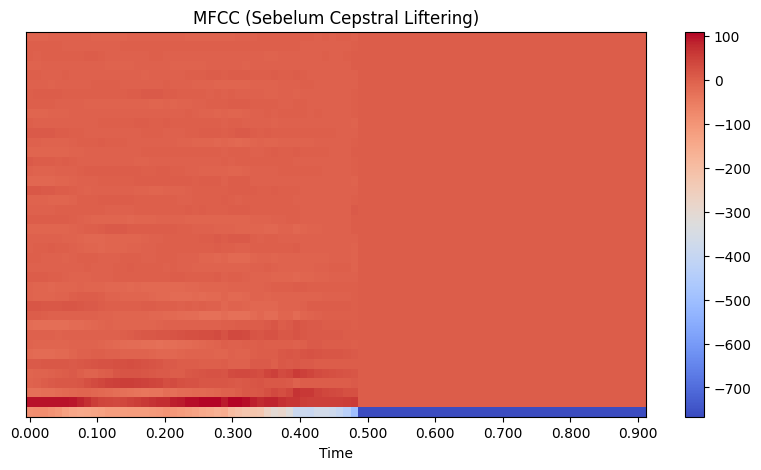

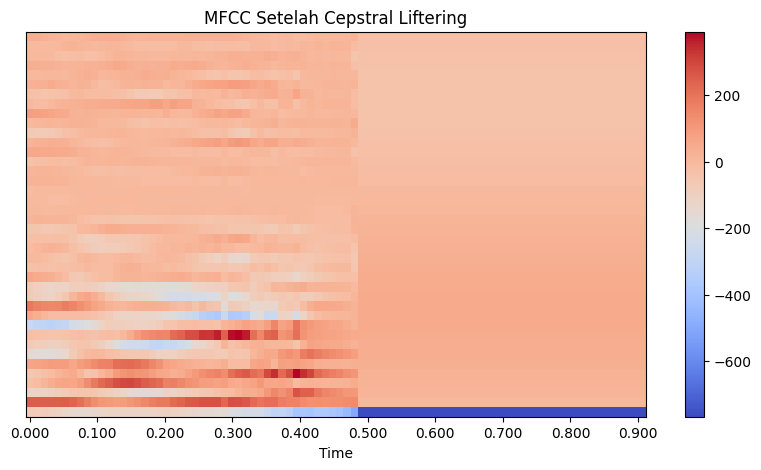

Ekstraksi MFCC selesai. Fitur tersimpan di 'mfcc_features.npy'


In [12]:
# Proses satu file
print(f"Processing: {file_path}")
mfcc_features = extract_mfcc(file_path, plot=True)

# Simpan fitur ke file numpy
np.save("mfcc_features_proses_bodoh.npy", mfcc_features)
print("Ekstraksi MFCC selesai. Fitur tersimpan di 'mfcc_features.npy'")